**Import Modules**

In [1]:
#importing necessary packages

import pandas as pd #data analysis and manipulation
import numpy as np #mathematical functions
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
from matplotlib import cm #colormap
from pandas.plotting import scatter_matrix #matrix of scatter plots
from sklearn.model_selection import StratifiedShuffleSplit #Stratified ShuffleSplit cross-validator

**Data Collection**

In [2]:
path = '/content/drive/MyDrive/ProjectAWS/Rental/immo_data.csv'

In [3]:
#read csv
df = pd.read_csv(path) 




 **Data Wrangling**

In [ ]:
#initial exploring
head = df.head()
inf = df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [ ]:

#Intial checking
print('States',df["regio1"].value_counts())
print('Districts',df['regio2'].unique().shape)
print('City',df["regio3"].unique().shape)


States Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64
Districts (419,)
City (8684,)


In [ ]:
#There are total 419 districts and we will use the data of Cologne (Köln) under the Nordhein_Westfalen

In [4]:
dfK = df.loc[df['regio2'] == 'Köln']
dfK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 253 to 268848
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    2709 non-null   object 
 1   serviceCharge             2579 non-null   float64
 2   heatingType               2314 non-null   object 
 3   telekomTvOffer            2241 non-null   object 
 4   telekomHybridUploadSpeed  429 non-null    float64
 5   newlyConst                2709 non-null   bool   
 6   balcony                   2709 non-null   bool   
 7   picturecount              2709 non-null   int64  
 8   pricetrend                2698 non-null   float64
 9   telekomUploadSpeed        2241 non-null   float64
 10  totalRent                 2277 non-null   float64
 11  yearConstructed           1972 non-null   float64
 12  scoutId                   2709 non-null   int64  
 13  noParkSpaces              935 non-null    float64
 14  firi

In [5]:
# Checking NAN values

print(dfK.isna().sum())

# Percentage of missing values in each column with respect to total data of Kohln

print((dfK.select_dtypes(include=np.number).isna().sum()/len(dfK)).sort_values(ascending=False))

# Drop all columns with 50% or more than 50% missing values 

cut = len(dfK) * .5
dfK_drp1 = dfK.dropna(thresh = cut, axis = 1)

# Again Check

# print((dfK_drp1.select_dtypes(include=np.number).isna().sum()/len(dfK)).sort_values(ascending=False))

# Drop NA based on Total Rent as this will be the Target Column:

dfk_drp2 = dfK_drp1.dropna(subset=["totalRent"]) 

# dfk_drp2.info()

dfk_drp2  = dfk_drp2.reset_index() #resetting index
dfk_drp2 = dfk_drp2.drop('index',axis=1) #drop the previous index
# dfk_drp2.info()
print((dfk_drp2.select_dtypes(include=np.number).isna().sum()/len(dfk_drp2)).sort_values(ascending=False))


regio1                         0
serviceCharge                130
heatingType                  395
telekomTvOffer               468
telekomHybridUploadSpeed    2280
newlyConst                     0
balcony                        0
picturecount                   0
pricetrend                    11
telekomUploadSpeed           468
totalRent                    432
yearConstructed              737
scoutId                        0
noParkSpaces                1774
firingTypes                  607
hasKitchen                     0
geo_bln                        0
cellar                         0
yearConstructedRange         737
baseRent                       0
houseNumber                  842
livingSpace                    0
geo_krs                        0
condition                    562
interiorQual                 955
petsAllowed                 1073
street                         0
streetPlain                  842
lift                           0
baseRentRange                  0
typeOfFlat

**Using GeoPandas For Choropleth Map**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
import geopandas as gpd
mapk = gpd.read_file("/content/drive/MyDrive/ProjectAWS/Rental/GeoMap/Stadtteil.shp")
#feature 'name' to 'regio3' to merge with dfk 
mapk = mapk.rename(columns={"name": "regio3"})
print(len(mapk['regio3'].unique()))
print(len(dfK['regio3'].unique()))
## Unique Area##
mapkuni = pd.DataFrame(mapk['regio3'].unique())
dfkuni =pd.DataFrame(dfK['regio3'].unique())


86
83


In [ ]:
samemap = mapkuni.merge(dfkuni, how='left', indicator=True)
samemap[samemap['_merge'] == 'left_only']


,0,_merge
14,Neustadt/Süd,left_only
15,Altstadt/Nord,left_only
22,Altstadt/Süd,left_only
23,Neustadt/Nord,left_only
81,Blumenberg,left_only


In [ ]:
same = dfkuni.merge(mapkuni, how='left', indicator=True)
same[same['_merge'] == 'left_only']


,0,_merge
0,Altstadt_&_Neustadt_Nord,left_only
6,Altstadt_&_Neustadt_Süd,left_only


	
Neustadt/Süd, Altstadt/Süd, Neustadt/Nord  and Altstadt/Nord are same as Altstadt_&_Neustadt_Nord  and Altstadt_&_Neustadt_Süd. 
Therefore, same values are replaced. Also, the value of Blumenberg missing. As, the missing value can not replaced with anything so it just remains empty.

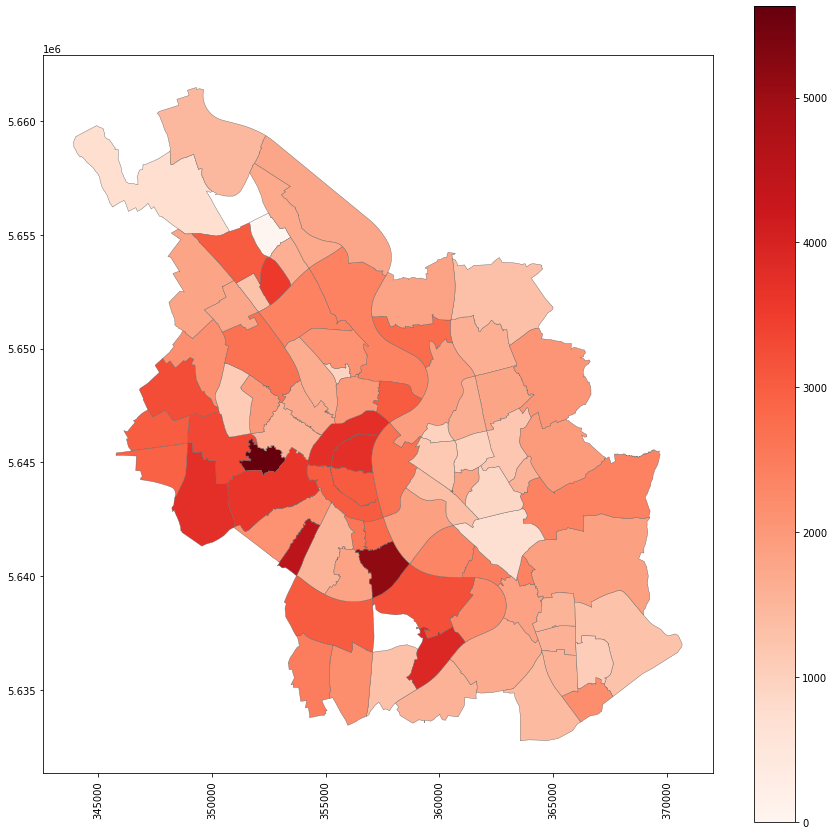

In [ ]:

mapk['regio3'].replace('Altstadt/Nord', 'Altstadt_&_Neustadt_Nord', inplace=True)
mapk['regio3'].replace('Altstadt/Süd', 'Altstadt_&_Neustadt_Süd', inplace=True)
mapk['regio3'].replace('Neustadt/Nord', 'Altstadt_&_Neustadt_Nord', inplace=True)
mapk['regio3'].replace('Neustadt/Süd', 'Altstadt_&_Neustadt_Süd', inplace=True)

#Merging both
info_map = mapk.merge(dfK, on="regio3")

#print(info_map.head(10))
#Multiple totalRent-values per part of the city. But we only want to show the mean of the total rent of different parts of the city.

mean_rent = info_map.groupby('regio3', as_index=False)['totalRent'].mean()

#merge again

info_map = mapk.merge(mean_rent, on="regio3")
#print(info_map.head(10))

#plotting the geo_heatmap

fig, ax = plt.subplots(1, figsize=(15, 15))
plt.xticks(rotation=90)

bx = info_map.plot(column="totalRent", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=5630))
bar_info._A = []
cbar = fig.colorbar(bar_info)

# Save the map to a png

fig.savefig('map_export.png', dpi=300)


**Using Follium for an interactive map**

In [ ]:
import folium 
!pip install mapclassify
info_map.explore(column="totalRent", cmap="Reds")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Process and Transform Data**

In [6]:
#From float 16 and float32 to float 64 for accurate resutls 

dfk_drp2[dfk_drp2.select_dtypes(np.float16).columns] = dfk_drp2.select_dtypes(np.float16).astype(np.float64)
dfk_drp2[dfk_drp2.select_dtypes(np.float32).columns] = dfk_drp2.select_dtypes(np.float32).astype(np.float64)
dfk_drp2[dfk_drp2.select_dtypes(np.int64).columns] = dfk_drp2.select_dtypes(np.int64).astype(np.float64)

dfk_drp2.info()

# Integers and floats are two different kinds of numerical data. An integer (more commonly called an int) is a number without 
# a decimal point. A float is a floating-point number, which means it is a number that has a decimal place. Floats are used when
# more precision is needed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   regio1                2277 non-null   object 
 1   serviceCharge         2209 non-null   float64
 2   heatingType           1970 non-null   object 
 3   telekomTvOffer        1946 non-null   object 
 4   newlyConst            2277 non-null   bool   
 5   balcony               2277 non-null   bool   
 6   picturecount          2277 non-null   float64
 7   pricetrend            2267 non-null   float64
 8   telekomUploadSpeed    1946 non-null   float64
 9   totalRent             2277 non-null   float64
 10  yearConstructed       1630 non-null   float64
 11  scoutId               2277 non-null   float64
 12  firingTypes           1750 non-null   object 
 13  hasKitchen            2277 non-null   bool   
 14  geo_bln               2277 non-null   object 
 15  cellar               



**CATEGORICAL DATA**

In [7]:
dfk_categorical = dfk_drp2.select_dtypes(include='object')
dfk_categorical_cols = dfk_categorical.columns.tolist()
print(dfk_categorical_cols)


['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3', 'description', 'facilities', 'date']


In [ ]:
#Dropping Unnecessary Columns

In [8]:
dfk_categorical_drp1 = dfk_categorical.drop (columns = ['regio1','firingTypes' ,'telekomTvOffer','geo_krs','houseNumber','geo_bln','facilities','description','regio3','regio2','streetPlain','street'])
print(dfk_categorical_drp1.columns.tolist())

['heatingType', 'condition', 'interiorQual', 'petsAllowed', 'typeOfFlat', 'date']


In [9]:
#visual check of categorical variable

heating = pd.DataFrame( dfk_categorical_drp1['heatingType'].value_counts().rename_axis('Types').reset_index(name='counts'))
cond = pd.DataFrame(dfk_categorical_drp1['condition'].value_counts().rename_axis('Types').reset_index(name='counts'))
intQual = pd.DataFrame(dfk_categorical_drp1['interiorQual'].value_counts().rename_axis('Types').reset_index(name='counts'))
petsall = pd.DataFrame(dfk_categorical_drp1['petsAllowed'].value_counts().rename_axis('Types').reset_index(name='counts'))
tpflt = pd.DataFrame(dfk_categorical_drp1['typeOfFlat'].value_counts().rename_axis('Types').reset_index(name='counts'))
date = pd.DataFrame(dfk_categorical_drp1['date'].value_counts().rename_axis('Types').reset_index(name='counts'))



dfk_list = [heating, cond, intQual, petsall, tpflt,date]


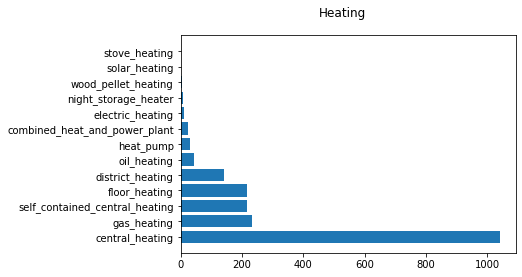

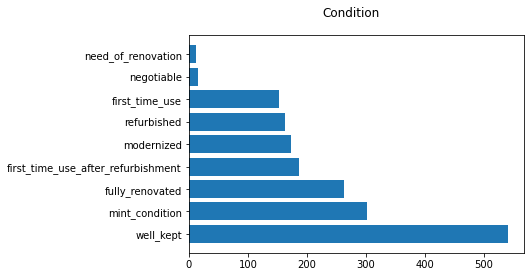

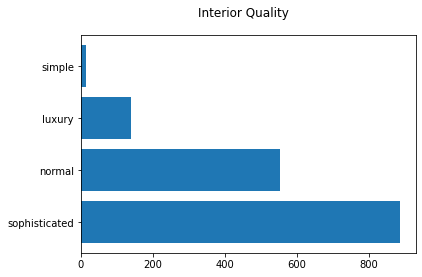

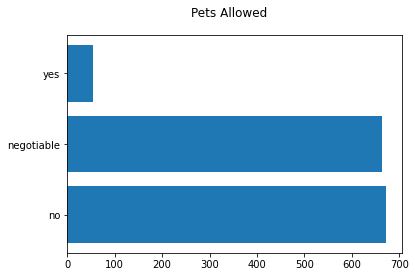

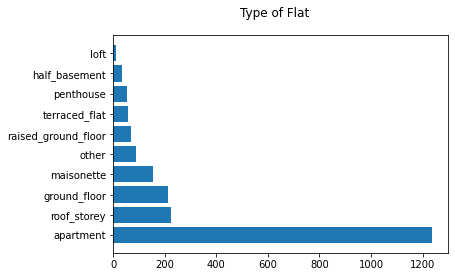

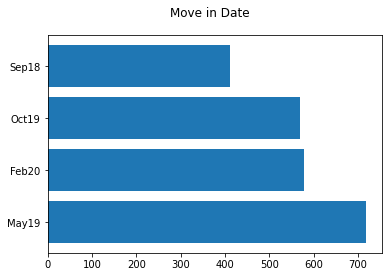

In [10]:
p = []
name = ['Heating', 'Condition', 'Interior Quality', 'Pets Allowed', 'Type of Flat','Move in Date']
for i in range(0,len(dfk_list)):
    fig = plt.figure()
    plt.barh(dfk_list[i].Types, dfk_list[i].counts)
    fig.suptitle(name[i])



In [11]:
 ## For simplicity and building framework ###
 
dfk_categorical_drp1 = dfk_categorical_drp1.drop (columns = ['heatingType','condition','typeOfFlat'])



**Numerical and Boolean Data**

In [12]:
dfk_numerical = dfk_drp2.select_dtypes(include='float64')
dfk_bool = dfk_drp2.select_dtypes(include='bool')
dfk_numerical_cols = dfk_numerical.columns.tolist()
dfk_bool_cols = df_bool = dfk_bool.columns.tolist()
print('Numerical', dfk_numerical_cols)
print('Bool', dfk_bool_cols)
# dfk_numerical.info()

Numerical ['serviceCharge', 'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId', 'yearConstructedRange', 'baseRent', 'livingSpace', 'baseRentRange', 'geo_plz', 'noRooms', 'floor', 'numberOfFloors', 'noRoomsRange', 'livingSpaceRange']
Bool ['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden']


In [13]:
# Pipeline for replacing boolean values with '1 and '0 :

dfk_bool = pd.DataFrame(dfk_bool)
dfk_bool.replace([True, False], [1,0], inplace = True)
dfk_bool.info()

#joining bool and numerical
dfk_num = dfk_bool.join(dfk_numerical.iloc[:,:])
dfk_num[dfk_num.select_dtypes(np.int64).columns] = dfk_num.select_dtypes(np.int64).astype(np.float16)

#Finding inf and changing them to NA

dfk_num_inf = dfk_num.isin([np.inf, -np.inf]).sum()
print(dfk_num_inf)
dfk_num.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Drop rows with NaN
# dfk_num.dropna(inplace=True)
dfk_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   newlyConst  2277 non-null   int64
 1   balcony     2277 non-null   int64
 2   hasKitchen  2277 non-null   int64
 3   cellar      2277 non-null   int64
 4   lift        2277 non-null   int64
 5   garden      2277 non-null   int64
dtypes: int64(6)
memory usage: 106.9 KB
newlyConst              0
balcony                 0
hasKitchen              0
cellar                  0
lift                    0
garden                  0
serviceCharge           0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
yearConstructedRange    0
baseRent                0
livingSpace             0
baseRentRange           0
geo_plz                 0
noRooms                 0
floor                   0
numberOfFloors        

In [14]:
#Dropping Unnecessary Columns

dfk_num_drp1 = dfk_num.drop(columns = [ 'scoutId','geo_plz'])

**HeatMap Correlation With Respect to Total Rent**

                      totalRent
newlyConst             0.096851
balcony                0.284820
hasKitchen             0.096469
cellar                 0.046491
lift                   0.207501
garden                 0.046807
serviceCharge          0.791793
picturecount           0.326909
pricetrend             0.031564
telekomUploadSpeed     0.001400
totalRent              1.000000
yearConstructed        0.135268
yearConstructedRange   0.215091
baseRent               0.990261
livingSpace            0.853527
baseRentRange          0.857573
noRooms                0.643306
floor                  0.089964
numberOfFloors         0.043384
noRoomsRange           0.634736
livingSpaceRange       0.806504


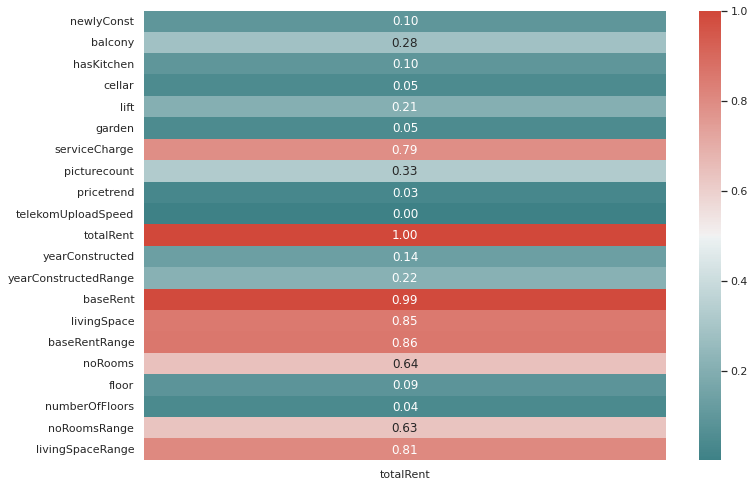

In [49]:
#correlation for the numerical data with respect to totalRent

corr = pd.DataFrame(dfk_num_drp1.corr()[['totalRent']].abs())#.sort_values(by='totalRent', ascending=False))
print(corr)

#visual representation
sns.set(rc={'figure.figsize':(11.7,8.27)})
cmap = sns.diverging_palette(200, 15, as_cmap=True)
sns.heatmap(corr, xticklabels=True, yticklabels=True, annot=True, cmap=cmap, fmt='.2f',annot_kws={'size': 12})


In [240]:
#getting_rid_of very high correlated and very low correlated 
#Both of them will give wrong prediction

dfk_drp3 = []
dfk_drp3Num = []

for i in range (1,len(corr)):
  if (corr.iloc[i].at['totalRent']>.2) and (corr.iloc[i].at['totalRent']<.9 ):
    dfk_drp3 = dfk_num_drp1.iloc[:,i]
    dfk_drp3Num.append(dfk_drp3)

  else:
    i

dfk_drp3Num = pd.DataFrame (dfk_drp3Num) # T for transpose
dfk_drp3Num = dfk_drp3Num.append(dfk_num_drp1['totalRent'])
dfk_drp3Num = dfk_drp3Num.T
dfk_drp3Num[dfk_drp3Num.select_dtypes(np.float16).columns] = dfk_drp3Num.select_dtypes(np.float16).astype(np.float64)


dfk_drp3Num.info()
dfk_drp3Num.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   balcony               2277 non-null   float64
 1   lift                  2277 non-null   float64
 2   serviceCharge         2209 non-null   float64
 3   picturecount          2277 non-null   float64
 4   yearConstructedRange  1630 non-null   float64
 5   livingSpace           2277 non-null   float64
 6   baseRentRange         2277 non-null   float64
 7   noRooms               2277 non-null   float64
 8   noRoomsRange          2277 non-null   float64
 9   livingSpaceRange      2277 non-null   float64
 10  totalRent             2277 non-null   float64
dtypes: float64(11)
memory usage: 195.8 KB


,balcony,lift,serviceCharge,picturecount,yearConstructedRange,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,totalRent
count,2277.000000,2277.000000,2209.000000,2277.000000,1630.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000
mean,0.689943,0.345630,188.383676,11.085200,4.272393,75.018560,5.646025,2.430610,2.394818,3.145367,1188.505459
std,0.462618,0.475678,104.978807,6.928694,2.784357,37.204427,1.698844,1.017107,1.003522,1.606895,625.642984
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,280.000000
25%,0.000000,0.000000,115.000000,7.000000,2.000000,50.000000,5.000000,2.000000,2.000000,2.000000,780.730000
50%,1.000000,0.000000,165.000000,10.000000,3.000000,70.000000,6.000000,2.000000,2.000000,3.000000,1000.000000
75%,1.000000,1.000000,245.000000,14.000000,7.000000,92.000000,7.000000,3.000000,3.000000,4.000000,1440.000000
max,1.000000,1.000000,850.000000,66.000000,9.000000,341.000000,9.000000,6.000000,5.000000,7.000000,5629.100000


**Transforming Data For The Algorithm**

In [242]:
#adding categorical and numerical for the algorithm

dfk_ml = dfk_drp3Num.join(dfk_categorical_drp1.iloc[:,:])
dfk_split = pd.DataFrame(dfk_ml)
dfk_split = dfk_split.drop(columns = ['yearConstructedRange'])
dfk_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   balcony           2277 non-null   float64
 1   lift              2277 non-null   float64
 2   serviceCharge     2209 non-null   float64
 3   picturecount      2277 non-null   float64
 4   livingSpace       2277 non-null   float64
 5   baseRentRange     2277 non-null   float64
 6   noRooms           2277 non-null   float64
 7   noRoomsRange      2277 non-null   float64
 8   livingSpaceRange  2277 non-null   float64
 9   totalRent         2277 non-null   float64
 10  interiorQual      1594 non-null   object 
 11  petsAllowed       1389 non-null   object 
 12  date              2277 non-null   object 
dtypes: float64(10), object(3)
memory usage: 231.4+ KB


In [243]:
#Assigning values to the chatagorical Variables 
# This can be a problem as it is not boolean data but assigning numbers so it measure them as values not as boolean
#one hot encoding is the right one

dfk_split["interiorQual"] = dfk_split["interiorQual"].map({"simple": 1, 
                                           "luxury": 2, 
                                           "normal": 3,
                                           "sophisticated": 4})
dfk_split["petsAllowed"] = dfk_split["petsAllowed"].map({"yes": 1, 
                                           "negotiable": 2, 
                                           "no": 3 })

dfk_split["date"] = dfk_split["date"].map({"Sep18": 1, 
                                           "Oct19": 2, 
                                           "Feb20": 3,
                                           "May19": 4})

print(dfk_split.isna().sum())
dfk_split.info()
dfk_split["date"] = dfk_split["date"].astype('float64')
dfk_split.info()


balcony               0
lift                  0
serviceCharge        68
picturecount          0
livingSpace           0
baseRentRange         0
noRooms               0
noRoomsRange          0
livingSpaceRange      0
totalRent             0
interiorQual        683
petsAllowed         888
date                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   balcony           2277 non-null   float64
 1   lift              2277 non-null   float64
 2   serviceCharge     2209 non-null   float64
 3   picturecount      2277 non-null   float64
 4   livingSpace       2277 non-null   float64
 5   baseRentRange     2277 non-null   float64
 6   noRooms           2277 non-null   float64
 7   noRoomsRange      2277 non-null   float64
 8   livingSpaceRange  2277 non-null   float64
 9   totalRent         2277 non-null   float64
 10 

In [244]:
dindex = dfk_split['petsAllowed'].index[dfk_split['petsAllowed'].apply(np.isnan)]
df_index = dfk_split.index.values.tolist()
dfk_split_drp1 = dfk_split.drop(dfk_split.index[[df_index.index(i) for i in dindex]])
print(dfk_split_drp1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 2276
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   balcony           1389 non-null   float64
 1   lift              1389 non-null   float64
 2   serviceCharge     1370 non-null   float64
 3   picturecount      1389 non-null   float64
 4   livingSpace       1389 non-null   float64
 5   baseRentRange     1389 non-null   float64
 6   noRooms           1389 non-null   float64
 7   noRoomsRange      1389 non-null   float64
 8   livingSpaceRange  1389 non-null   float64
 9   totalRent         1389 non-null   float64
 10  interiorQual      1124 non-null   float64
 11  petsAllowed       1389 non-null   float64
 12  date              1389 non-null   float64
dtypes: float64(13)
memory usage: 151.9 KB
None


In [245]:
dindex = dfk_split_drp1['interiorQual'].index[dfk_split_drp1['interiorQual'].apply(np.isnan)]
df_index = dfk_split_drp1.index.values.tolist()
[df_index.index(i) for i in dindex]
dfk_split_drp2 = dfk_split_drp1.drop(dfk_split_drp1.index[[df_index.index(i) for i in dindex]])

#print(dfk_split.isna().sum())
dindex = dfk_split_drp2['serviceCharge'].index[dfk_split_drp2['serviceCharge'].apply(np.isnan)]
df_index = dfk_split_drp2.index.values.tolist()
[df_index.index(i) for i in dindex]
dfk_split_drp3 = dfk_split_drp2.drop(dfk_split_drp2.index[[df_index.index(i) for i in dindex]])

In [246]:
dfk_split = dfk_split_drp3.reset_index(drop = True)
print(dfk_split.info())
print(dfk_split.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   balcony           1111 non-null   float64
 1   lift              1111 non-null   float64
 2   serviceCharge     1111 non-null   float64
 3   picturecount      1111 non-null   float64
 4   livingSpace       1111 non-null   float64
 5   baseRentRange     1111 non-null   float64
 6   noRooms           1111 non-null   float64
 7   noRoomsRange      1111 non-null   float64
 8   livingSpaceRange  1111 non-null   float64
 9   totalRent         1111 non-null   float64
 10  interiorQual      1111 non-null   float64
 11  petsAllowed       1111 non-null   float64
 12  date              1111 non-null   float64
dtypes: float64(13)
memory usage: 113.0 KB
None
balcony             0
lift                0
serviceCharge       0
picturecount        0
livingSpace         0
baseRentRange       0
noRooms 

**Splitting Data**

In [247]:
X = dfk_split.drop(columns = "totalRent",axis = 1)
y = dfk_split['totalRent']


In [248]:
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train_c.shape)
print("y_train shape:", y_train_c.shape)
print("X_test shape:", X_test_c.shape)
print("y_test shape:", y_test_c.shape)

X_train shape: (888, 12)
y_train shape: (888,)
X_test shape: (223, 12)
y_test shape: (223,)


In [249]:
# #Splitting the data with StratifiedShuffleSplit
# # X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
# # y = np.array([0, 0, 0, 1, 1, 1])
# print(X)
# data_K_split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=29)
# for train_index, test_index in data_K_split.split(X,y):
#   X_train, y_train = X[train_index], y[train_index]
#   X_test, y_test = X[test_index], y[test_index]
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)


In [250]:
# #Let’s also separate the predictors and the labels, since we don’t necessarily want to
# #apply the same transformations to the predictors and the target values 
# y_train_c = strat_train_set["totalRent"].copy()
# X_train_c = strat_train_set.drop("totalRent", axis=1)

# y_test_c = strat_test_set["totalRent"].copy()
# X_test_c = strat_test_set.drop("totalRent", axis=1)
# #X_train_c.info()
# #X_test_c.info()

**Building Pipeline and Fitting**

In [251]:
X_train = pd.DataFrame((X_train_c))
X_test = pd.DataFrame((X_test_c))


In [252]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb



models_to_test = {
                  'decision tree': DecisionTreeRegressor(),
                  'random forest': RandomForestRegressor(),
                  'Ada Boost': AdaBoostRegressor(),
                  'ML Regressor' : MLPRegressor(),
                  'XGBoost Regressor': xgb.XGBRegressor()
                  }


[02:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


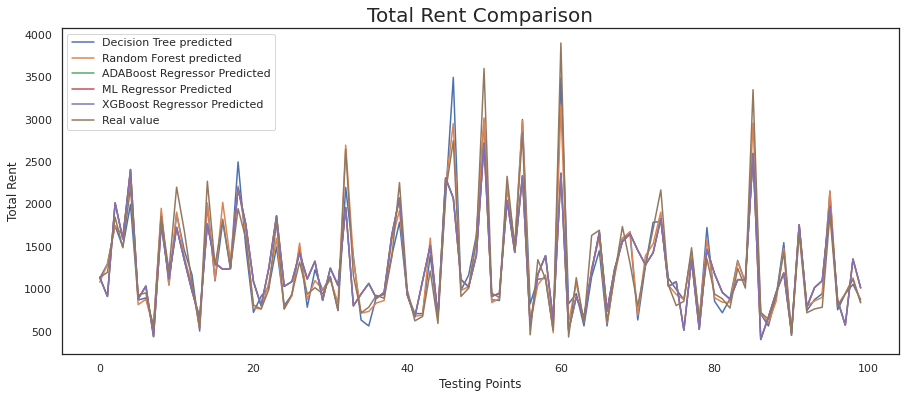

In [253]:
#Predicting and Plotting


models_to_test['decision tree'].fit(X_train, y_train_c)
models_to_test['random forest'].fit(X_train, y_train_c)
models_to_test['Ada Boost'].fit(X_train, y_train_c)
models_to_test['ML Regressor'].fit(X_train, y_train_c)
models_to_test['XGBoost Regressor'].fit(X_train, y_train_c)



y_predictraind = models_to_test['decision tree'].predict(X_train)
y_predictrainr = models_to_test['random forest'].predict(X_train)
y_predictrainada = models_to_test['Ada Boost'].predict(X_train)
y_predictrainml = models_to_test['ML Regressor'].predict(X_train)
y_predictrainxg = models_to_test['XGBoost Regressor'].predict(X_train)

y_predictestd = models_to_test['decision tree'].predict(X_test)
y_predictestr = models_to_test['random forest'].predict(X_test)
y_predictestada = models_to_test['Ada Boost'].predict(X_test)
y_predictestml = models_to_test['ML Regressor'].predict(X_test)
y_predictestxg = models_to_test['XGBoost Regressor'].predict(X_test)


# Plotting
print_range = 100
x_range = range(print_range)
sns.set_style('white')
fig = plt.subplots(figsize=(15, 6))

plt.plot(x_range, y_predictestd[:print_range], label='Decision Tree predicted')
plt.plot(x_range, y_predictestr[:print_range], label='Random Forest predicted')
plt.plot(x_range, y_predictestml[:print_range], label='ADABoost Regressor Predicted')
plt.plot(x_range, y_predictestml[:print_range], label='ML Regressor Predicted')
plt.plot(x_range, y_predictestml[:print_range], label='XGBoost Regressor Predicted')
plt.plot(x_range, y_test_c[:print_range], label='Real value')

plt.title(f'Total Rent Comparison', fontsize=20)
plt.ylabel("Total Rent")
plt.xlabel("Testing Points")
plt.legend()
# plt.tight_layout()
plt.show()
# print(len(y_train_c))
# print(len(y_predict))

yr = pd.DataFrame([y_predictraind,y_predictrainr,y_predictrainada,y_predictrainml,y_predictrainxg ])

y = pd.DataFrame([y_predictestd,y_predictestr,y_predictestada,y_predictestml,y_predictestxg ])



**Definitions:**
https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

**R Square/Adjusted R Square**
R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square.

R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

**MSE **is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

**Root Mean Square Error(RMSE)** is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

**Mean Absolute Error(MAE)** is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.Compare to MSE or RMSE, MAE is a more direct representation of sum of error terms. MSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

**Compraison**:
R Square/Adjusted R Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models.It makes total sense to use MSE if the value is not too big and MAE if you do not want to penalize large prediction errors.
Adjusted R square is the only metric here that considers the overfitting problem.

As we are trying to compare performance between regression models, so we did calculate MAE, RMSE and MSE. 

**Finding the Best Model by Error Analysis**


In [254]:
# MSE and RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings


def predict_and_return_error(y_predict, y_test):
    MAE = mean_absolute_error(y_test, y_predict)
    lin_mse = mean_squared_error(y_test, y_predict)
    lin_rmse = np.sqrt(lin_mse)
    r2 = r2_score(y_test, y_predict)
    warnings.simplefilter("ignore")

    return MAE, lin_rmse,r2


In [255]:
error = [] #for test data
er = [] #for test data
trer = [] #for training data
trerror =[] #for training data

for i in range (0,len(y)):
  error = predict_and_return_error(y.iloc[i,:], y_test_c)
  er.append(error)
# print(er)

for i in range (0,len(y)):
  trerror = predict_and_return_error(yr.iloc[i,:], y_train_c)
  trer.append(trerror)
# print(trer)

  

name = ['Decision Tree','Random Forest','ADA Boost', 'ML','XGBoost']

er = pd.DataFrame(er)
er['Name'] = name
er = er.rename(columns={0: 'MAE', 1: 'RMSE', 2: 'R^2'})

print(er)

          MAE        RMSE       R^2           Name
0  121.515740  192.924378  0.907482  Decision Tree
1   93.985528  141.211146  0.950434  Random Forest
2  132.285047  181.101235  0.918475      ADA Boost
3  213.442869  300.539818  0.775481             ML
4   90.082320  143.304734  0.948953        XGBoost


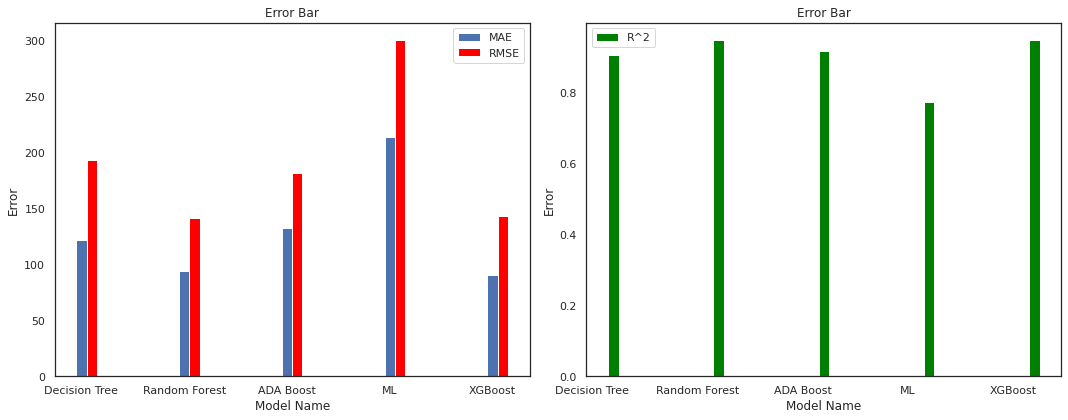

In [256]:
model_name = er.iloc[:,3]
error = er.iloc[0:2,0:3]
x = np.arange(len(model_name))
width = .2
rows = 1
columns = 2
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(rows, columns, 1)
plt.bar(x, er.iloc[:,0], width/2,label = 'MAE')
plt.bar(x+ width/2, er.iloc[:,1], width/2, label = 'RMSE',color = 'red')
plt.xticks(x,model_name)
# plt.yticks(x,model_name)
plt.xlabel("Model Name")
plt.ylabel("Error")
plt.title("Error Bar")
plt.tight_layout()
plt.legend()

fig.add_subplot(rows, columns, 2)
plt.bar(x+ width/2*2, er.iloc[:,2], width/2, label = 'R^2',color = 'green')




plt.xticks(x,model_name)
# plt.yticks(x,model_name)
plt.xlabel("Model Name")
plt.ylabel("Error")
plt.title("Error Bar")
plt.tight_layout()
plt.legend()
plt.show()



**It is clear from the above graph that Random Forest and XGBoost works best in all three metrics of model selection.**

## **Hyper Parameter Training**

In [257]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**RandomizedSearchCV**

**Random Forest**

In [258]:
RF_model=RandomForestRegressor()
RF_model.fit(X_train_c,y_train_c)

RandomForestRegressor()

In [259]:
parameters = {'n_estimators': [20,25,100,200],

'max_features': ['auto', 'sqrt'],

'max_depth': [16,18],

'min_samples_split': [2,3],

'min_samples_leaf':  [1,2,3],
              
'random_state': [10,42],
              
'bootstrap': [True, False]}

tuning_model_RF = RandomizedSearchCV(RF_model,parameters,scoring='neg_mean_squared_error', cv = 5)
tuning_model_RF.fit(X_train_c,y_train_c)
tuning_model_RF.best_params_

{'random_state': 10,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

**XGBRegressor**

In [260]:
parameters = { 'colsample_bytree': [0.3, 0.5],
              'gamma': [0.2, 0.4, 0.5],
              'max_depth': [3, 4, 5,6],
              'min_child_weight': [1.5, 2],
              'reg_alpha': [50,55,58],
              'reg_lambda': [0,0.5, 0.6],
              'random_state': [20,30,42]
             }
tuning_model_XG = RandomizedSearchCV(xgb.XGBRegressor(),parameters,scoring='neg_mean_squared_error', cv = 5)
tuning_model_XG.fit(X_train_c,y_train_c)
warnings.simplefilter("ignore")
tuning_model_XG.best_params_    


[02:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'reg_lambda': 0.6,
 'reg_alpha': 55,
 'random_state': 42,
 'min_child_weight': 2,
 'max_depth': 3,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

**Train, Predict and Error Analysis Using the Hyper Tuned Parameters**

In [261]:
models_to_test_Hyper = { 'random forest Hyper': RandomForestRegressor(n_estimators= 200, bootstrap= True, max_depth=16,max_features='auto', min_samples_leaf=3,min_samples_split=3,random_state=42),
                  'XGBoost Regressor Hyper': xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.2, max_depth=3, min_child_weight=1.5, reg_alpha=50, reg_lambda=0.5,random_state=50)
                  }

[02:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


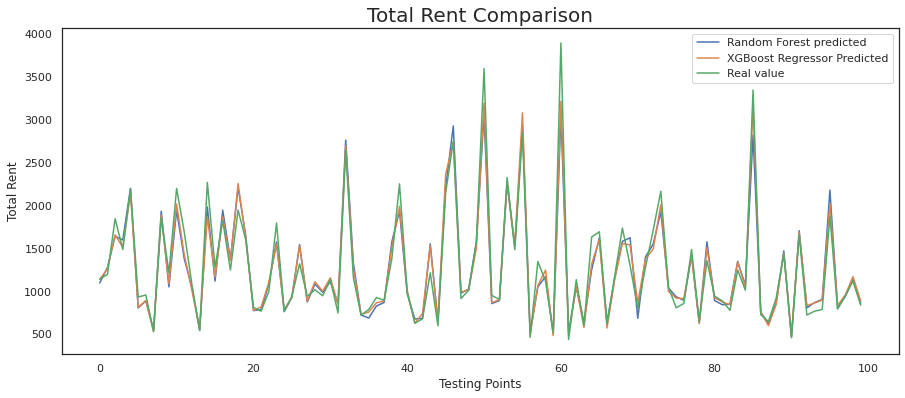

In [262]:
#Predicting and Plotting

models_to_test_Hyper['random forest Hyper'].fit(X_train, y_train_c)
models_to_test_Hyper['XGBoost Regressor Hyper'].fit(X_train, y_train_c)



y_predictrainrh = models_to_test_Hyper['random forest Hyper'].predict(X_train)
y_predictrainxgh = models_to_test_Hyper['XGBoost Regressor Hyper'].predict(X_train)

y_predictestrh = models_to_test_Hyper['random forest Hyper'].predict(X_test)
y_predictestxgh = models_to_test_Hyper['XGBoost Regressor Hyper'].predict(X_test)


# Plotting
print_range = 100
x_range = range(print_range)
sns.set_style('white')
fig = plt.subplots(figsize=(15, 6))

plt.plot(x_range, y_predictestrh[:print_range], label='Random Forest predicted')
plt.plot(x_range, y_predictestxgh[:print_range], label='XGBoost Regressor Predicted')
plt.plot(x_range, y_test_c[:print_range], label='Real value')

plt.title(f'Total Rent Comparison', fontsize=20)
plt.ylabel("Total Rent")
plt.xlabel("Testing Points")
plt.legend()
# plt.tight_layout()
plt.show()
# print(len(y_train_c))
# print(len(y_predict))

yrh = pd.DataFrame([y_predictrainrh,y_predictrainxgh ])

yh = pd.DataFrame([y_predictestrh,y_predictestxgh ])


# **Error Analysis**

In [263]:
errorh = [] #for test data
erh = [] #for test data
trerh = [] #for training data
trerrorh =[] #for training data

for i in range (0,len(yh)):
  errorh = predict_and_return_error(yh.iloc[i,:], y_test_c)
  erh.append(errorh)
# print(er)

for i in range (0,len(yh)):
  trerrorh = predict_and_return_error(yrh.iloc[i,:], y_train_c)
  trerh.append(trerrorh)
# print(trer)

  

nameh = ['Random Forest','XGBoost']

erh = pd.DataFrame(erh)
erh['Name'] = nameh
erh = erh.rename(columns={0: 'MAE', 1: 'RMSE', 2: 'R^2'})

print(erh)

        MAE        RMSE       R^2           Name
0  92.24692  143.480781  0.948827  Random Forest
1  85.42010  126.227569  0.960394        XGBoost


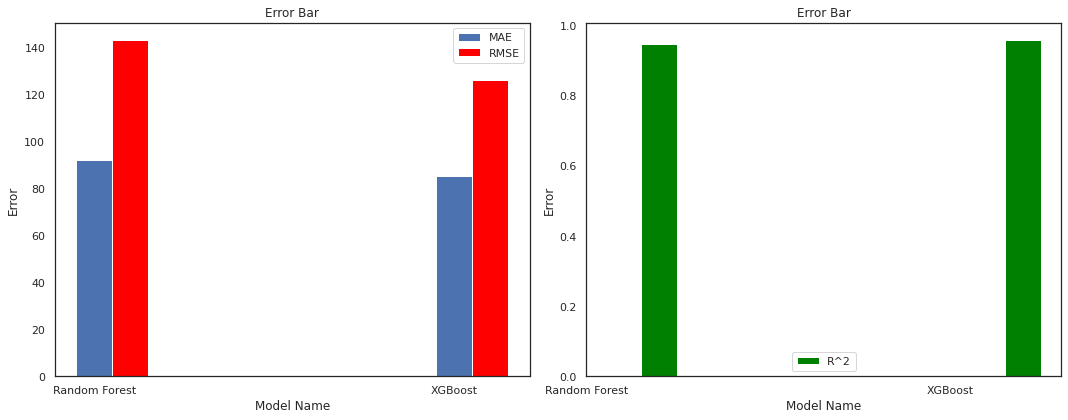

In [264]:
model_nameh = erh.iloc[:,3]
errorh = erh.iloc[0:2,0:3]
xh = np.arange(len(model_nameh))
width = .2
rows = 1
columns = 2
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(rows, columns, 1)
plt.bar(xh, erh.iloc[:,0], width/2,label = 'MAE')
plt.bar(xh+ width/2, erh.iloc[:,1], width/2, label = 'RMSE',color = 'red')
plt.xticks(xh,model_nameh)
# plt.yticks(x,model_name)
plt.xlabel("Model Name")
plt.ylabel("Error")
plt.title("Error Bar")
plt.tight_layout()
plt.legend()

fig.add_subplot(rows, columns, 2)
plt.bar(xh+ width/2*2, erh.iloc[:,2], width/2, label = 'R^2',color = 'green')




plt.xticks(xh,model_nameh)
# plt.yticks(x,model_name)
plt.xlabel("Model Name")
plt.ylabel("Error")
plt.title("Error Bar")
plt.tight_layout()
plt.legend()
plt.show()


**XGBoost is giving slightly better prediction than Random Forest**

**This will give you the approximate rent of the house you want to live in depending on the features you like. This is a demo project. I am thinking about adding additional features which will give location as well as estimated rent**


In [ ]:
 0   balcony           2277 non-null   float64
 1   lift              2277 non-null   float64
 2   serviceCharge     2209 non-null   float64
 3   picturecount      2277 non-null   float64
 4   livingSpace       2277 non-null   float64
 5   baseRentRange     2277 non-null   float64
 6   noRooms           2277 non-null   float64
 7   noRoomsRange      2277 non-null   float64
 8   livingSpaceRange  2277 non-null   float64
 9   totalRent         2277 non-null   float64
 10  interiorQual      1594 non-null   object 
 11  petsAllowed       1389 non-null   object 
 12  date              2277 non-null   object 
dtypes: float64(10), object(3)

In [300]:
print("Enter House Details to Predict Rent")
a = int(input("Balcony (Yes = 1, No = 0): "))
b = int(input("Lift (Yes = 1 , No = 0): "))
c = int(input("Service Charge (Range from 0 to 780):  "))
d = int(input("Picture Available To See (Range 0 to 66) :")) #how many pictures were uploaded to the listing
e = int(input("Living Space (Range 0 to 341 sqm) :"))  #living space in sqm
f = int(input("Base Rent Range (Range 1 to 9) :")) #binned base rent, 1 to 9
g = int(input(" Number of Rooms (Range 1 to 6):  ")) #rooms can be 2 and 2.5,1.5 etc
h = int(input("Number of Rooms Range (Range is 1 to 5):  ")) # binned number of rooms, 1 to 5
i = int(input("Living Space Range (Range is 1 to 7): ")) #binned living space, 1 to 7
j = int(input("Interior Quality (simple = 1, luxury = 2, normal = 3, sophisticated = 4): "))
k = int(input("Pets Allowed (Yes = 1, Negotiable = 2, No = 3): "))
l = int(input("Move in Date (Sep18 = 1, Oct19 = 2, Feb20 = 3, May19: 4): "))

features = np.array([[a, b, c, d, e, f, g, 
                      h, i,j,k,l]])
print("Predicted House Price = ", models_to_test['random forest'].predict(features))

Enter House Details to Predict Rent
Number of Balcony (Yes = 1, No = 0): 1
Lift (Yes = 1 , No = 0): 1
Service Charge (Range from 0 to 780):  200
Picture count (Range 0 to 66) :33
Living Space (Range 0 to 341 sq) :300
Base Rent Range (Range 1 to 9) :5
 Number of Rooms (Range 1 to 6):  2
Number of Rooms Range (Range is 1 to 5):  2
Living Space Range (Range is 1 to 7): 2
Interior Quality (simple = 1, luxury = 2, normal = 3, sophisticated = 4): 2
Pets Allowed (Yes = 1, Negotiable = 2, No = 3): 2
Move in Date (Sep18 = 1, Oct19 = 2, Feb20 = 3, May19: 4): 2
Predicted House Price =  [975.8842]


**My computer is old and it is taking quite a time to get results using gridsearchCV. I am pausing a bit on GridsearchCV right now but I will post the result soon.**

**GridSearchCV**

In [ ]:
parameters = {'n_estimators': [20,25,100,200],

'max_features': ['auto', 'sqrt'],

'max_depth': [16,18],

'min_samples_split': [2,3],

'min_samples_leaf':  [1,2,3],
              
'random_state': [10,42],
              
'bootstrap': [True, False]}

tuning_model_RF = GridSearchCV(RF_model,parameters,scoring='neg_mean_squared_error', cv = 5)
tuning_model_RF.fit(X_train_c,y_train_c)
tuning_model_RF.best_params_

In [ ]:
parameters = { 'colsample_bytree': [0.3, 0.5],
              'gamma': [0.2, 0.4, 0.5],
              'max_depth': [3, 4, 5,6],
              'min_child_weight': [1.5, 2],
              'reg_alpha': [50,55,58],
              'reg_lambda': [0,0.5, 0.6],
              'random_state': [20,30,42]
             }
from sklearn.model_selection import GridSearchCV
tuning_model_XG = GridSearchCV(xgb.XGBRegressor(),parameters,scoring='neg_mean_squared_error', cv = 5)
tuning_model_XG.fit(X_train_c,y_train_c)
warnings.simplefilter("ignore")
tuning_model_XG.best_params_  

In [ ]:
#Predicting and Plotting
models_to_test_HyperG = { 'random forest HyperG': RandomForestRegressor(n_estimators= 200, bootstrap= True, max_depth=16,max_features='auto', min_samples_leaf=3,min_samples_split=3,random_state=42),
                  'XGBoost Regressor HyperG': xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.2, max_depth=3, min_child_weight=1.5, reg_alpha=50, reg_lambda=0.5,random_state=50)
                  }
models_to_test_HyperG['random forest HyperG'].fit(X_train, y_train_c)
models_to_test_HyperG['XGBoost Regressor HyperG'].fit(X_train, y_train_c)



y_predictrainrhG = models_to_test_HyperG['random forest HyperG'].predict(X_train)
y_predictrainxghG = models_to_test_HyperG['XGBoost Regressor HyperG'].predict(X_train)

y_predictestrhG = models_to_test_HyperG['random forest HyperG'].predict(X_test)
y_predictestxghG = models_to_test_HyperG['XGBoost Regressor HyperG'].predict(X_test)


# Plotting
print_range = 100
x_range = range(print_range)
sns.set_style('white')
fig = plt.subplots(figsize=(15, 6))

plt.plot(x_range, y_predictestrhG[:print_range], label='Random Forest predicted')
plt.plot(x_range, y_predictestxghG[:print_range], label='XGBoost Regressor Predicted')
plt.plot(x_range, y_test_c[:print_range], label='Real value')

plt.title(f'Total Rent Comparison', fontsize=20)
plt.ylabel("Total Rent")
plt.xlabel("Testing Points")
plt.legend()
# plt.tight_layout()
plt.show()
# print(len(y_train_c))
# print(len(y_predict))

yrhG = pd.DataFrame([y_predictrainrhG,y_predictrainxghG ])

yhG = pd.DataFrame([y_predictestrhG,y_predictestxghG ])

In [ ]:
errorhG = [] #for test data
errorhG = [] #for test data
trerhG = [] #for training data
trerrorhG =[] #for training data

for i in range (0,len(yhG)):
  errorhG = predict_and_return_error(yhG.iloc[i,:], y_test_c)
  erhG.append(errorhG)
# print(er)

for i in range (0,len(yhG)):
  trerrorhG = predict_and_return_error(yrhG.iloc[i,:], y_train_c)
  trerhG.append(trerrorhG)
# print(trer)

  

namehG = ['Random Forest','XGBoost']

erhG = pd.DataFrame(erhG)
erhG['Name'] = namehG
erhG = erhG.rename(columns={0: 'MAE', 1: 'RMSE', 2: 'R^2'})

print(erhG)

In [ ]:
model_namehG = erhG.iloc[:,3]
errorhG = erhG.iloc[0:2,0:3]
xhG = np.arange(len(model_namehG))
width = .2
rows = 1
columns = 2
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(rows, columns, 1)
plt.bar(xhG, erhGiloc[:,0], width/2,label = 'MAE')
plt.bar(xhG+ width/2, erhG.iloc[:,1], width/2, label = 'RMSE',color = 'red')
plt.xticks(xhG,model_nameh)
# plt.yticks(x,model_name)
plt.xlabel("Model Name")
plt.ylabel("Error")
plt.title("Error Bar")
plt.tight_layout()
plt.legend()

fig.add_subplot(rows, columns, 2)
plt.bar(xhG+ width/2*2, erhG.iloc[:,2], width/2, label = 'R^2',color = 'green')




plt.xticks(xhG,model_namehG)
# plt.yticks(x,model_name)
plt.xlabel("Model Name")
plt.ylabel("Error")
plt.title("Error Bar")
plt.tight_layout()
plt.legend()
plt.show()
